## Introduction
This file can be run to visualize the tram runs and determine dates for projecting. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
tram_data_including_labels = pd.read_csv('../data/tram_complete.csv')

In [3]:
tram_data = tram_data_including_labels.drop(columns=['Polygon_type', 'Topo_feature'])

In [126]:
def plot_tram_data(year):
    tram_year = tram_data[tram_data['Year'] == year]

    daily_avg = tram_year.groupby(["date", "Stop_number"]).agg({
        "Albedo": "mean",
        "NDVI": "mean"
    }).reset_index()

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True)

    sns.lineplot(ax=axes[0], data=daily_avg, x="date", y="Albedo", hue="Stop_number", palette="coolwarm", alpha=0.5)
    axes[0].set_title("Avg. Albedo per Stop")
    axes[0].legend([],[], frameon=False)

    sns.lineplot(ax=axes[1], data=daily_avg, x="date", y="NDVI", hue="Stop_number", palette="coolwarm", alpha=0.5)
    axes[1].set_title(f"{year} Avg. NDVI per Stop")
    axes[1].legend([],[], frameon=False)

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [167]:

def plot_tram_data(year):
    tram_year = tram_data[tram_data['Year'] == year].copy()

    daily_avg = (
        tram_year.groupby(["date", "Stop_number"])
        .agg({"Albedo": "mean", "NDVI": "mean"})
        .reset_index()
    )

    daily_avg["date"] = pd.to_datetime(daily_avg["date"])
    gap_threshold = pd.Timedelta(days=1)

    # Get a color for each Stop_number
    stops = sorted(daily_avg["Stop_number"].unique())
    palette = sns.color_palette("viridis", len(stops))
    color_map = dict(zip(stops, palette))

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7.5), sharex=True)

    for stop, df_stop in daily_avg.groupby("Stop_number"):
        df_stop = df_stop.sort_values("date").reset_index(drop=True)
        gaps = df_stop["date"].diff() > gap_threshold

        # Split into continuous segments
        segment_start = 0
        for i, is_gap in enumerate(gaps):
            if is_gap:
                segment = df_stop.iloc[segment_start:i]
                if len(segment) > 1:
                    axes[0].plot(segment["date"], segment["Albedo"],
                                 color=color_map[stop], alpha=0.5)
                    axes[1].plot(segment["date"], segment["NDVI"],
                                 color=color_map[stop], alpha=0.5)
                segment_start = i
        # Last segment
        segment = df_stop.iloc[segment_start:]
        if len(segment) > 1:
            axes[0].plot(segment["date"], segment["Albedo"],
                         color=color_map[stop], alpha=0.5)
            axes[1].plot(segment["date"], segment["NDVI"],
                         color=color_map[stop], alpha=0.5)

    axes[0].set_title("Avg. Albedo per Stop")
    axes[1].set_title(f"{year} Avg. NDVI per Stop")

    for ax in axes:
        ax.legend([], [], frameon=False)
        ax.set_xlabel("")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [168]:
tram_data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'DD_AKST', 'DD_Expected_AKST', 'Offset_time', 'DD_UTC', 'Run_number',
       'Stop_number', 'Height', 'ShortW_inc', 'ShortW_out', 'Albedo',
       'LongW_inc', 'LongW_out', 'Net_shortW', 'Net_longW', 'Net_Rad',
       'Sol_Irr_inc', 'Sol_Irr_out', 'PAR_inc', 'PAR_out', 'fPAR', 'Red_i',
       'NIR_i', 'Red_r', 'NIR_r', 'NDVI', 'T_air_C', 'T_surf_C', 'date'],
      dtype='object')

In [169]:
def bar_plot(date):

    # Filter the data for the specific date
    selected_date = date
    filtered = tram_data[tram_data['date'] == selected_date]

    # Group by Stop_number and calculate mean Albedo
    albedo_by_stop = filtered.groupby('Stop_number')['Albedo'].median()

    # Create a 2D array: one column per stop, height = e.g., 10 pixels
    num_pixels_tall = 1
    albedo_array = np.tile(albedo_by_stop.values, (num_pixels_tall, 1))

    # Plot
    plt.figure(figsize=(12, 1.5))
    plt.imshow(albedo_array, aspect='auto', cmap='viridis', vmin=0, vmax=1, extent=[albedo_by_stop.index.min(), albedo_by_stop.index.max(), 0, num_pixels_tall])
    # plt.colorbar(label='Average Albedo')
    plt.xlabel('Stop Number')
    plt.yticks([]) 
    plt.title(f'Median Albedo per Stop on {selected_date}')
    plt.tight_layout()
    plt.show()

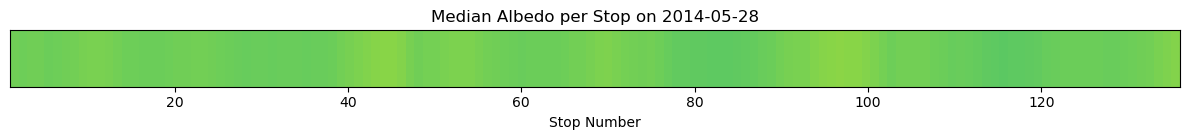

In [170]:
bar_plot('2014-05-28')

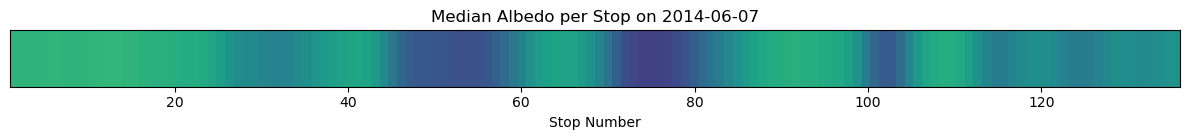

In [171]:
bar_plot('2014-06-07')

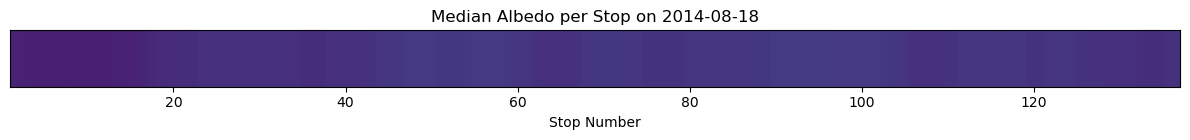

In [172]:
bar_plot('2014-08-18')

In [173]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import imageio
# from datetime import datetime

# # Step 1: Filter tram_data to 2014 only
# tram_data['date'] = pd.to_datetime(tram_data['date'])  # ensure datetime format
# tram_data_2014 = tram_data[tram_data['date'].dt.year == 2017]

# # Step 2: Create a temporary folder for the images
# output_dir = "../plots"
# os.makedirs(output_dir, exist_ok=True)

# # Step 3: Get sorted list of unique dates in 2014
# unique_dates = sorted(tram_data_2014['date'].dt.date.unique())

# # Step 4: Create and save plots
# image_filenames = []

# for date in unique_dates:
#     filtered = tram_data_2014[tram_data_2014['date'].dt.date == date]
#     albedo_by_stop = filtered.groupby('Stop_number')['Albedo'].median()
    
#     if albedo_by_stop.empty:
#         continue  # skip dates with no data
    
#     albedo_array = np.tile(albedo_by_stop.values, (1, 1))
    
#     fig, ax = plt.subplots(figsize=(12, 1.5))
#     im = ax.imshow(
#         albedo_array,
#         aspect='auto',
#         cmap='viridis',
#         vmin=0,
#         vmax=1,
#         extent=[albedo_by_stop.index.min(), albedo_by_stop.index.max(), 0, 1]
#     )
#     ax.set_xlabel('Stop Number')
#     ax.set_yticks([])
#     ax.set_title(f'Median Albedo per Stop on {date}')
    
#     # Add colorbar below
#     cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2)
#     cbar.set_label('Median Albedo')
    
#     filename = os.path.join(output_dir, f"{date}.png")
#     plt.savefig(filename, bbox_inches='tight')
#     plt.close(fig)
    
#     image_filenames.append(filename)

# # Step 5: Create GIF from saved images
# gif_filename = "albedo_2017.gif"
# with imageio.get_writer(gif_filename, mode='I', duration=0.3) as writer:
#     for filename in image_filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)

# print(f"GIF saved as: {gif_filename}")


### 2014 Dates

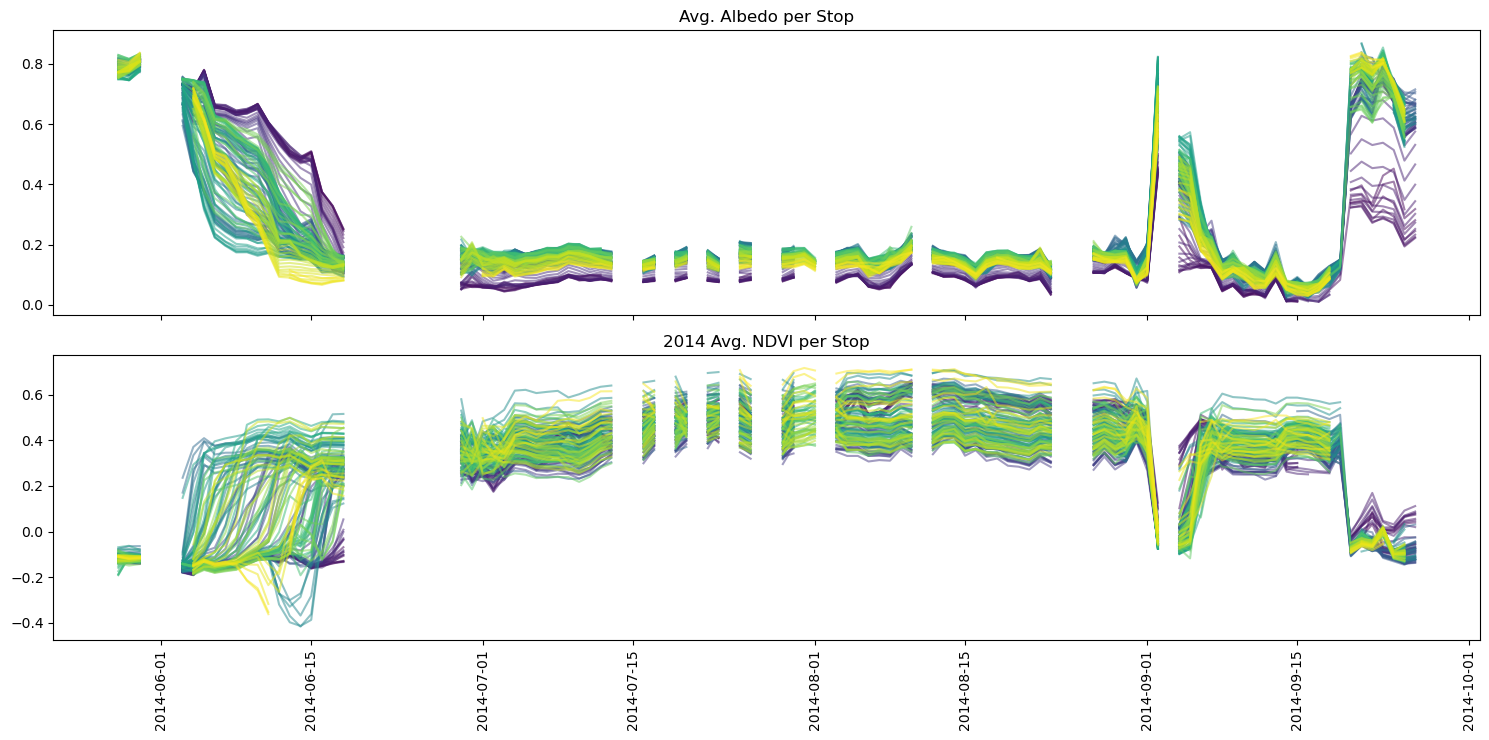

In [174]:
plot_tram_data(2014)

In [144]:
# print all days individual daily albedo ffrom 2017-04-25 through 2017-06-25
for day in pd.date_range(start='2014-06-14', end='2014-07-05'):
    day_str = day.strftime('%Y-%m-%d')
    daily_avg = tram_data[tram_data['date'] == day_str]['Albedo'].mean()
    print(f"{day_str}: {daily_avg}")

2014-06-14: 0.23440845070422536
2014-06-15: 0.2316220588235294
2014-06-16: 0.17553222836095767
2014-06-17: 0.1537843137254902
2014-06-18: 0.13598275862068968
2014-06-19: nan
2014-06-20: nan
2014-06-21: nan
2014-06-22: nan
2014-06-23: nan
2014-06-24: nan
2014-06-25: 0.1413970588235294
2014-06-26: nan
2014-06-27: nan
2014-06-28: nan
2014-06-29: 0.14328787878787874
2014-06-30: 0.14699218749999998
2014-07-01: 0.14338137472283813
2014-07-02: 0.13003322259136213
2014-07-03: 0.13977725118483414
2014-07-04: 0.13565570599613153
2014-07-05: 0.13428438661710038


In [145]:
# print all days individual daily albedo ffrom 2017-04-25 through 2017-06-25
for day in pd.date_range(start='2016-04-21', end='2016-05-12'):
    day_str = day.strftime('%Y-%m-%d')
    daily_avg = tram_data[tram_data['date'] == day_str]['Albedo'].mean()
    print(f"{day_str}: {daily_avg}")

2016-04-21: 0.8286029411764706
2016-04-22: 0.8206764705882352
2016-04-23: 0.8147720588235294
2016-04-24: 0.8275110294117647
2016-04-25: 0.8227867647058824
2016-04-26: 0.8357022058823529
2016-04-27: nan
2016-04-28: 0.810110294117647
2016-04-29: 0.815875
2016-04-30: nan
2016-05-01: nan
2016-05-02: nan
2016-05-03: nan
2016-05-04: nan
2016-05-05: nan
2016-05-06: 0.7981102941176471
2016-05-07: 0.804965811965812
2016-05-08: 0.8171724137931033
2016-05-09: 0.7444044117647058
2016-05-10: 0.7824189189189188
2016-05-11: 0.7060051813471502
2016-05-12: 0.667283422459893


In [146]:
# print all days individual daily albedo ffrom 2017-04-25 through 2017-06-25
for day in pd.date_range(start='2017-05-21', end='2017-06-10'):
    day_str = day.strftime('%Y-%m-%d')
    daily_avg = tram_data[tram_data['date'] == day_str]['Albedo'].mean()
    print(f"{day_str}: {daily_avg}")

2017-05-21: 0.8364362745098038
2017-05-22: 0.828955882352941
2017-05-23: 0.8291274509803921
2017-05-24: 0.7850367647058822
2017-05-25: 0.8304068627450981
2017-05-26: 0.8252916666666666
2017-05-27: 0.7573627450980391
2017-05-28: 0.7278700980392157
2017-05-29: 0.7278700980392157
2017-05-30: 0.7793627450980393
2017-05-31: 0.7500563725490196
2017-06-01: 0.721985294117647
2017-06-02: 0.7132446043165468
2017-06-03: 0.7411990171990173
2017-06-04: 0.7472230215827338
2017-06-05: 0.7697769607843138
2017-06-06: 0.7432818627450981
2017-06-07: 0.7396813725490196
2017-06-08: 0.7332941176470588
2017-06-09: 0.7255784313725488
2017-06-10: 0.6892475490196077


In [147]:
tram_data[tram_data['Year'] == 2014]['date'].unique()

array(['2014-05-28', '2014-05-29', '2014-05-30', '2014-06-03',
       '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-07',
       '2014-06-08', '2014-06-09', '2014-06-10', '2014-06-11',
       '2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
       '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-25',
       '2014-06-29', '2014-06-30', '2014-07-01', '2014-07-02',
       '2014-07-03', '2014-07-06', '2014-07-07', '2014-07-08',
       '2014-07-09', '2014-07-10', '2014-07-11', '2014-07-12',
       '2014-07-16', '2014-07-17', '2014-07-19', '2014-07-22',
       '2014-07-23', '2014-07-25', '2014-07-26', '2014-07-29',
       '2014-07-30', '2014-08-01', '2014-08-03', '2014-08-04',
       '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08',
       '2014-08-09', '2014-08-10', '2014-08-12', '2014-08-15',
       '2014-08-17', '2014-08-18', '2014-08-19', '2014-08-20',
       '2014-08-21', '2014-08-22', '2014-08-23', '2014-08-25',
       '2014-08-27', '2014-08-31', '2014-09-01', '2014-

In [148]:
tram_data_2014 = tram_data[tram_data['Year'] == 2014]
print("Earliest Date 2014:", tram_data_2014['date'].min())
print("Latest Date 2014:", tram_data_2014['date'].max())

Earliest Date 2014: 2014-05-28
Latest Date 2014: 2014-09-27


In [149]:
# spring snow day

tram_2014_snow = tram_data[(tram_data['Year'] == 2014) & (tram_data['date'] <= '2014-05-30')].groupby(by=['date']).median().reset_index()
max_snow_albedo = tram_2014_snow.loc[tram_2014_snow['Albedo'].idxmax(), 'date']
print('2014 Spring Snow Day with Max Albedo:', max_snow_albedo)


2014 Spring Snow Day with Max Albedo: 2014-05-30


In [150]:
# spring transition day 

tram_2014_transition = tram_data[(tram_data['Year'] == 2014) & (tram_data['date'] >= '2014-05-30') & (tram_data['date'] <= '2014-06-25')].groupby(by=['date']).agg({
    'Albedo': lambda x: x.max() - x.min()
}).reset_index()

max_range_day = tram_2014_transition.loc[tram_2014_transition['Albedo'].idxmax(), 'date']
print('2014 Spring Transition Day with greatest range:', max_range_day)

2014 Spring Transition Day with greatest range: 2014-06-10


In [151]:
# growing season 

tram_2014_growing_season = tram_data[(tram_data['Year'] == 2014) & (tram_data['date'] >= '2014-06-25') & (tram_data['date'] <= '2014-09-19')].groupby(by=['date']).median().reset_index()
max_ndvi_day = tram_2014_growing_season.loc[tram_2014_growing_season['NDVI'].idxmax(), ['date', 'NDVI']]
print('2014 Date of Maximum Median NDVI:', max_ndvi_day)

2014 Date of Maximum Median NDVI: date    2014-07-23
NDVI         0.511
Name: 21, dtype: object


### 2015 Dates

In [152]:
tram_data_2015 = tram_data[tram_data['Year'] == 2015]
print("Earliest Date 2015:", tram_data_2015['date'].min())
print("Latest Date 2015:", tram_data_2015['date'].max())

Earliest Date 2015: 2015-05-17
Latest Date 2015: 2015-10-21


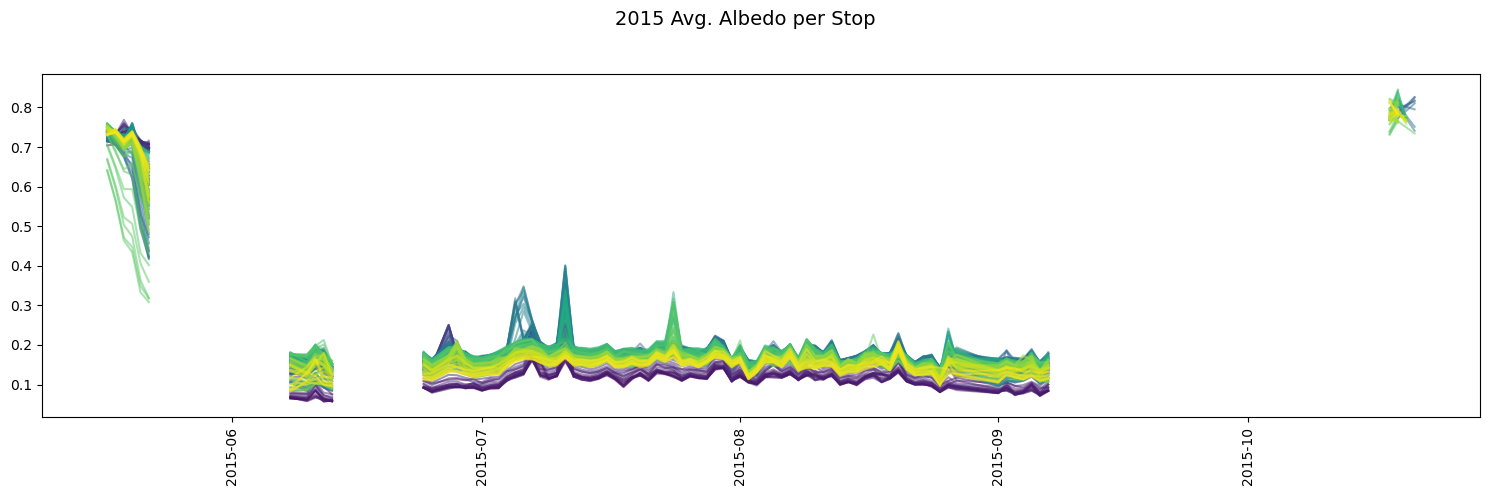

In [164]:
plot_tram_data(2015)


In [188]:
tram_data[tram_data['Year'] == 2015]['date'].unique()

array(['2015-05-17', '2015-05-18', '2015-05-19', '2015-05-20',
       '2015-05-21', '2015-05-22', '2015-06-08', '2015-06-10',
       '2015-06-11', '2015-06-12', '2015-06-13', '2015-06-24',
       '2015-06-25', '2015-06-27', '2015-06-28', '2015-06-29',
       '2015-06-30', '2015-07-01', '2015-07-02', '2015-07-03',
       '2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15',
       '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19',
       '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23',
       '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-27',
       '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31',
       '2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
       '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
       '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
       '2015-08-13', '2015-08-14', '2015-08-15', '2015-

In [189]:
# growing season 

tram_2015_growing_season = tram_data[(tram_data['Year'] == 2015) & (tram_data['date'] >= '2015-06-08') & (tram_data['date'] <= '2015-09-07')].groupby(by=['date']).median().reset_index()
tram_2015_growing_season
max_ndvi_day = tram_2015_growing_season.loc[tram_2015_growing_season['NDVI'].idxmax(), ['date', 'NDVI']]
print('2015 Date of Maximum Median NDVI:', max_ndvi_day)

2015 Date of Maximum Median NDVI: date    2015-08-02
NDVI        0.5635
Name: 43, dtype: object


### 2016 Dates

In [190]:
tram_data_2016 = tram_data[tram_data['Year'] == 2016]
print("Earliest Date 2016:", tram_data_2016['date'].min())
print("Latest Date 2016:", tram_data_2016['date'].max())

Earliest Date 2016: 2016-04-21
Latest Date 2016: 2016-08-03


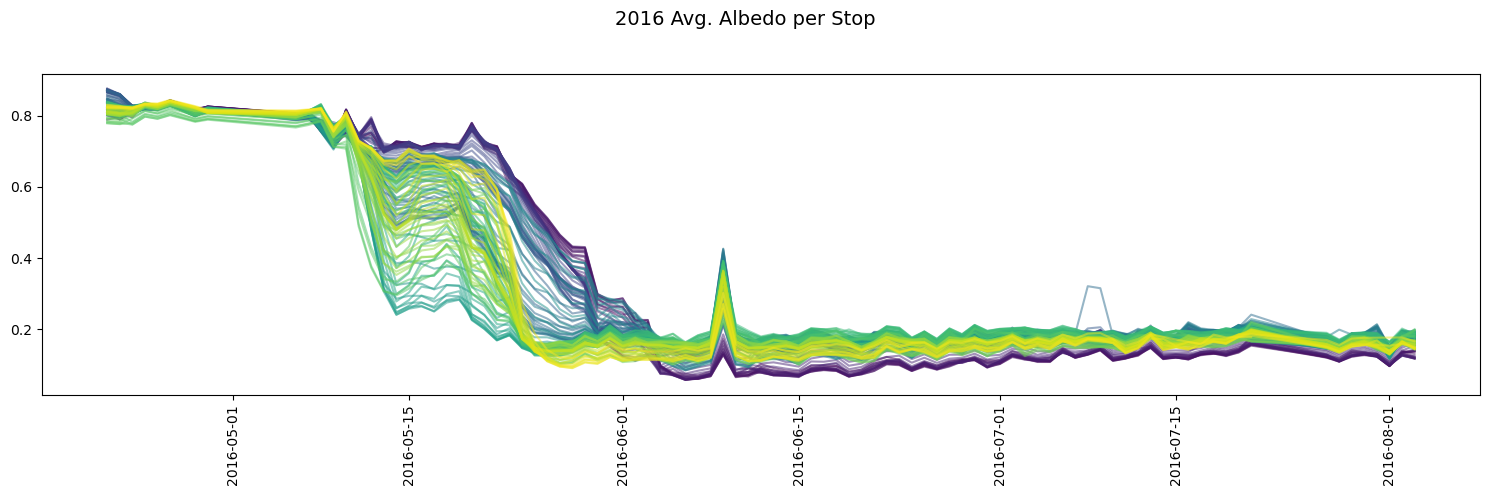

In [165]:
plot_tram_data(2016)

In [192]:
# spring snow day

tram_2016_snow = tram_data[(tram_data['Year'] == 2016) & (tram_data['date'] >= '2016-04-21') & (tram_data['date'] <= '2016-05-10')].groupby(by=['date']).median().reset_index()
max_snow_albedo = tram_2016_snow.loc[tram_2016_snow['Albedo'].idxmax(), 'date']
print('2016 Spring Snow Day with Max Albedo:', max_snow_albedo)


2016 Spring Snow Day with Max Albedo: 2016-04-26


In [113]:
# spring transition day 

tram_2016_transition = tram_data[(tram_data['Year'] == 2016) & (tram_data['date'] >= '2016-05-10') & (tram_data['date'] <= '2016-06-03')].groupby(by=['date']).agg({
    'Albedo': lambda x: x.max() - x.min()
}).reset_index()

max_range_day = tram_2016_transition.loc[tram_2016_transition['Albedo'].idxmax(), 'date']
print('2016 Spring Transition Day with greatest range:', max_range_day)

2016 Spring Transition Day with greatest range: 2016-05-20


### 2017 Dates

In [114]:
tram_data_2017 = tram_data[tram_data['Year'] == 2017]
print("Earliest Date 2017:", tram_data_2017['date'].min())
print("Latest Date 2017:", tram_data_2017['date'].max())

Earliest Date 2017: 2017-04-25
Latest Date 2017: 2017-09-22


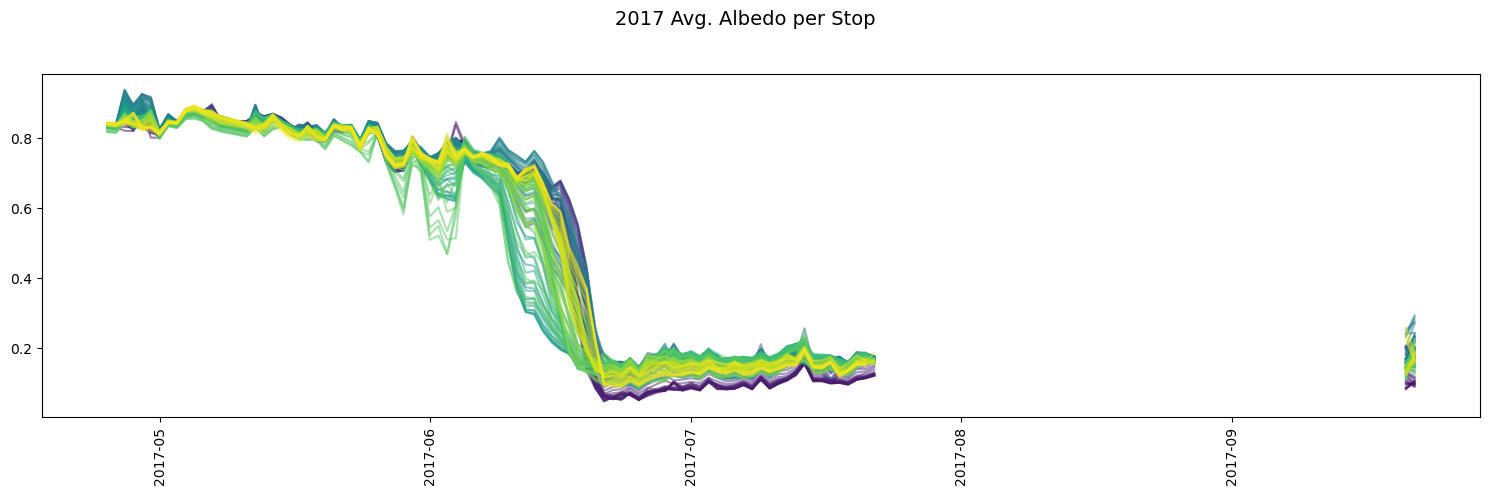

In [166]:
plot_tram_data(2017)

In [49]:
tram_data[tram_data['Year'] == 2017]['date'].unique()

array(['2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
       '2017-04-29', '2017-04-30', '2017-05-01', '2017-05-02',
       '2017-05-03', '2017-05-04', '2017-05-05', '2017-05-06',
       '2017-05-07', '2017-05-08', '2017-05-11', '2017-05-12',
       '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
       '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
       '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
       '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
       '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
       '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
       '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
       '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
       '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
       '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
       '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
       '2017-06-26', '2017-06-28', '2017-06-29', '2017-

In [64]:
# spring snow day

tram_2017_snow = tram_data[(tram_data['Year'] == 2017) & (tram_data['date'] >= '2017-04-25') & (tram_data['date'] <= '2017-05-26')].groupby(by=['date']).median().reset_index()
max_snow_albedo = tram_2017_snow.loc[tram_2017_snow['Albedo'].idxmax(), 'date']
print('2017 Spring Snow Day with Max Albedo:', max_snow_albedo)


2016 Spring Snow Day with Max Albedo: 2017-05-05


In [65]:
# spring transition day 

tram_2017_transition = tram_data[(tram_data['Year'] == 2017) & (tram_data['date'] >= '2017-05-26') & (tram_data['date'] <= '2017-06-20')].groupby(by=['date']).agg({
    'Albedo': lambda x: x.max() - x.min()
}).reset_index()

max_range_day = tram_2017_transition.loc[tram_2017_transition['Albedo'].idxmax(), 'date']
print('2017 Spring Transition Day with greatest range:', max_range_day)

2017 Spring Transition Day with greatest range: 2017-06-14
